In [1]:
#https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets?select=creditcard.csv

In [63]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [64]:
df = pd.read_csv('../practice/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [65]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


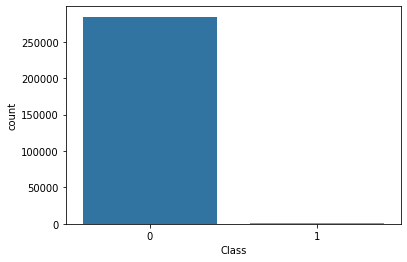

In [66]:
#Check the target variable
sns.countplot('Class', data=df)

In [67]:
#check null values
df.isnull().sum().max()


0

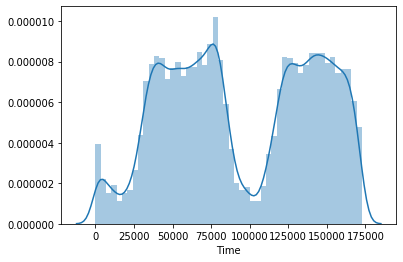

In [68]:
sns.distplot(df['Time'])
#sns.distplot(df['Amount'])

(0.0, 172792.0)

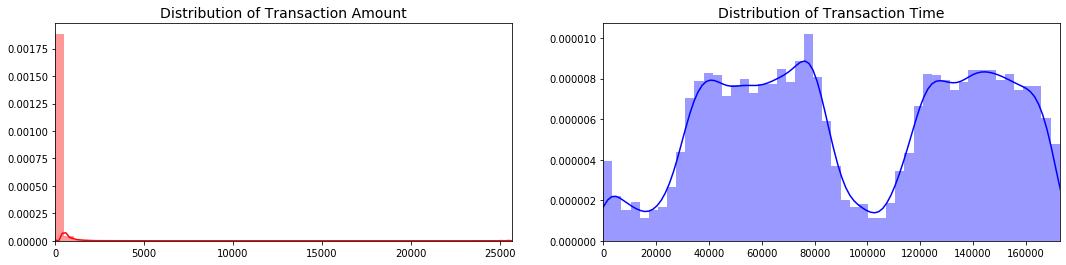

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

These are skewed distributions. Also we need to scale them.

In [70]:
df.shape

(284807, 31)

In [71]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [72]:
fraud = len(df[df['Class']==1])
print(fraud)

nFraud = len(df[df['Class']==0])
print(nFraud)

492
284315


In [73]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [74]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [75]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)

#Moving Scaled Amount and time to 0th and 1st place in df dataset
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [76]:
X = df.drop('Class', axis = 1)
y = df['Class']


# SMOTE technique (over sampling)

In [78]:
X_resample, y_resample = SMOTE().fit_sample(X, y)
print('The number of transactions after resampling : ' + str(len(X_resample)))
print('If the number of frauds is equal to the number of normal tansactions? ' + str(sum(y_resample == 0) == sum(y_resample == 1)))

The number of transactions after resampling : 568630
If the number of frauds is equal to the number of normal tansactions? True


In [101]:
f = sum(y_resample==1)
print(f)

nf = sum(y_resample==0)
print(nf)

284315
284315


In [137]:
#X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [138]:
model = RandomForestClassifier()

In [139]:
model.fit(X_resample,y_resample)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [140]:
importances = model.feature_importances_

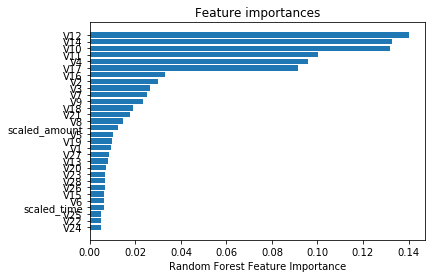

In [141]:
col_names = df.columns
idxs = np.argsort(importances)
plt.title("Feature importances")
plt.barh(range(len(idxs)),   importances[idxs],  align = 'center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
plt.show()


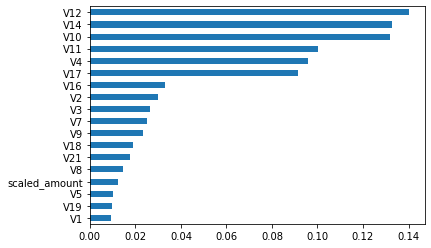

In [142]:
#instead of showing all features, picked top 18
importances = model.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-18:].plot(kind = 'barh')

In [107]:
X1 = X_resample[['V14','V10','V4','V11','V12', 'V17','V16','V3',"V7",'V2', 'V18','V9','V8',"V5",'V6','V1','V19','scaled_amount']]
y1 = y_resample

In [109]:
X1.head()

,V14,V10,V4,V11,V12,V17,V16,V3,V7,V2,V18,V9,V8,V5,V6,V1,V19,scaled_amount
0,-0.311169,0.090794,1.378155,-0.551600,-0.617801,0.207971,-0.470401,2.536347,0.239599,-0.072781,0.025791,0.363787,0.098698,-0.338321,0.462388,-1.359807,0.403993,1.783274
1,-0.143772,-0.166974,0.448154,1.612727,1.065235,-0.114805,0.463917,0.166480,-0.078803,0.266151,-0.183361,-0.255425,0.085102,0.060018,-0.082361,1.191857,-0.145783,-0.269825
2,-0.165946,0.207643,0.379780,0.624501,0.066084,1.109969,-2.890083,1.773209,0.791461,-1.340163,-0.121359,-1.514654,0.247676,-0.503198,1.800499,-1.358354,-2.261857,4.983721
3,-0.287924,-0.054952,-0.863291,-0.226487,0.178228,-0.684093,-1.059647,1.792993,0.237609,-0.185226,1.965775,-1.387024,0.377436,-0.010309,1.247203,-0.966272,-1.232622,1.418291
4,-1.119670,0.753074,0.403034,-0.822843,0.538196,-0.237033,-0.451449,1.548718,0.592941,0.877737,-0.038195,0.817739,-0.270533,-0.407193,0.095921,-1.158233,0.803487,0.670579


In [119]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y1)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=3)


In [112]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, neural_network
MLA = [
    linear_model.LogisticRegressionCV(),
    naive_bayes.GaussianNB(),
    tree.DecisionTreeClassifier(max_depth=3),
    ensemble.RandomForestClassifier(max_depth=3, n_estimators=10, max_features=1),
    neural_network.MLPClassifier(alpha=1)
]

In [130]:
from sklearn.metrics import confusion_matrix, precision_score ,auc, roc_curve

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    
    MLA_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    
    
    row_index+=1
MLA_compare.sort_values(by = ['F1 Score'], ascending = False, inplace = True)
MLA_compare

,MLA Name,F1 Score
4,MLPClassifier,0.955556
3,RandomForestClassifier,0.949721
0,LogisticRegressionCV,0.943820
1,GaussianNB,0.925714
2,DecisionTreeClassifier,0.914286


# Random Undersampling

In [132]:
from imblearn.under_sampling import RandomUnderSampler
# Implementing Undersampling for Handling Imbalanced 
rus = RandomUnderSampler(random_state=0)
X_res,y_res=rus.fit_sample(X,y)


In [133]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [134]:
X2 = X_res[['V14','V10','V4','V11','V12', 'V17','V16','V3',"V7",'V2', 'V18','V9','V8',"V5",'V6','V1','V19','scaled_amount']]
y2 = y_res

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=3)


In [136]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'F1 Score'] = f1_score(y_test, predicted)
    
    
    row_index+=1
MLA_compare.sort_values(by = ['F1 Score'], ascending = False, inplace = True)
MLA_compare

,MLA Name,F1 Score
1,GaussianNB,0.949721
4,MLPClassifier,0.946237
0,LogisticRegressionCV,0.935484
2,DecisionTreeClassifier,0.913978
3,RandomForestClassifier,0.913295


#Result:
SMOTE technique works better as compared to random undersampling

<------------ End of file ------------>